<a href="https://colab.research.google.com/github/Sam-Joshua-S/100DaysOfData/blob/main/Day%2012%20Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Seaborn and its advantage


*   built on top of Matplotlib
*   Default themes  are still attractive
*   Simple to use especially for analysis
*   Declarative API helps us to join focus on the granular element of the chart



## Down Side
*  Leads to out of memory issues especially while creating multiple figures
*  Doesnt support many customization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid')

In [3]:
heart_failure_data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
heart_failure_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
agg_data = heart_failure_data.groupby(['age', 'DEATH_EVENT'], as_index=False).ejection_fraction.count()
agg_data.columns = ['Age', 'Death_Event', 'Count']
agg_data.head()

,Age,Death_Event,Count
0,40.0,0,7
1,41.0,0,1
2,42.0,0,6
3,42.0,1,1
4,43.0,0,1


##Trend Chart

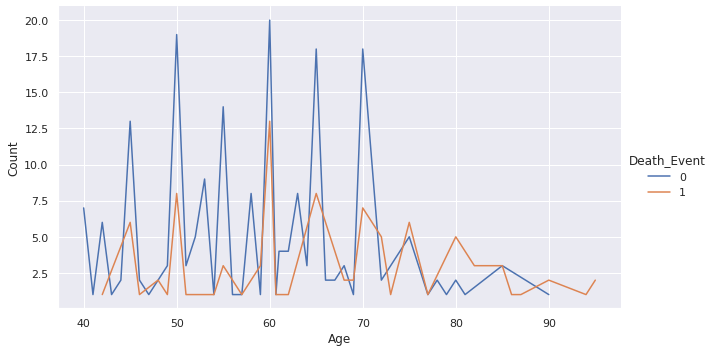

In [5]:
sns.relplot(x="Age", y="Count", 
            hue="Death_Event" , aspect=16/9,
            kind="line", data=agg_data);

##Scatter Plot

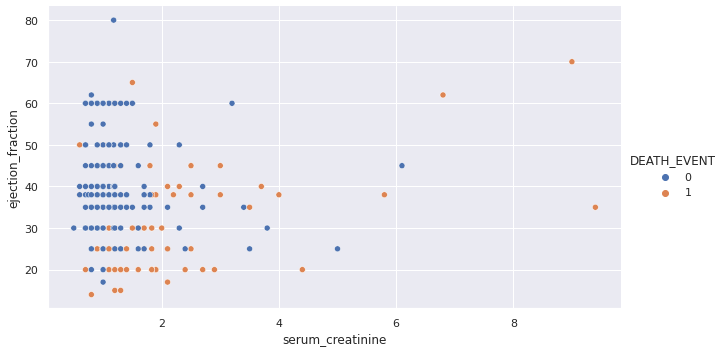

In [6]:
sns.relplot(x="serum_creatinine", y="ejection_fraction", 
            hue="DEATH_EVENT", kind="scatter", # Kind is optional
            data=heart_failure_data, aspect=16/9);

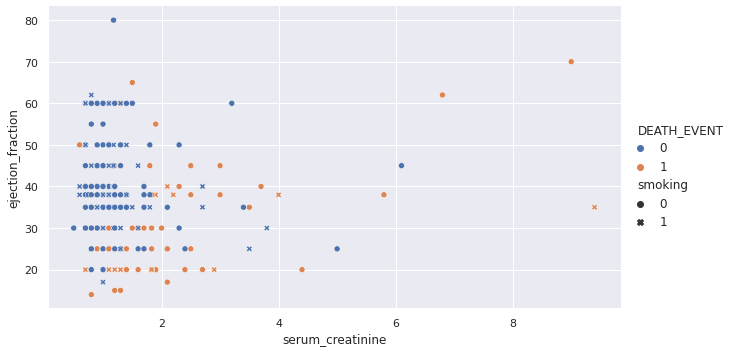

In [7]:
sns.relplot(x="serum_creatinine", y="ejection_fraction", 
            hue="DEATH_EVENT", kind="scatter", # Kind is optional
            style="smoking",
            data=heart_failure_data, aspect=16/9);

##Heatmap

In [8]:
agg_data2 = heart_failure_data.groupby(['age', 'ejection_fraction'], as_index=False).DEATH_EVENT.sum()
agg_data2.columns = ['Age', 'ejection_fraction', 'Deaths']
agg_data2_p = agg_data2.pivot(index='Age', columns='ejection_fraction', values='Deaths')
agg_data2_p.fillna(0, inplace=True)
agg_data2_p.head(20)

ejection_fraction,14,15,17,20,25,30,35,38,40,45,50,55,60,62,65,70,80
Age,,,,,,,,,,,,,,,,,
40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45.0,1.0,0.0,0.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


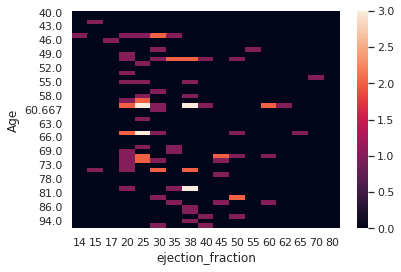

In [9]:
sns.heatmap(agg_data2_p)
plt.show()

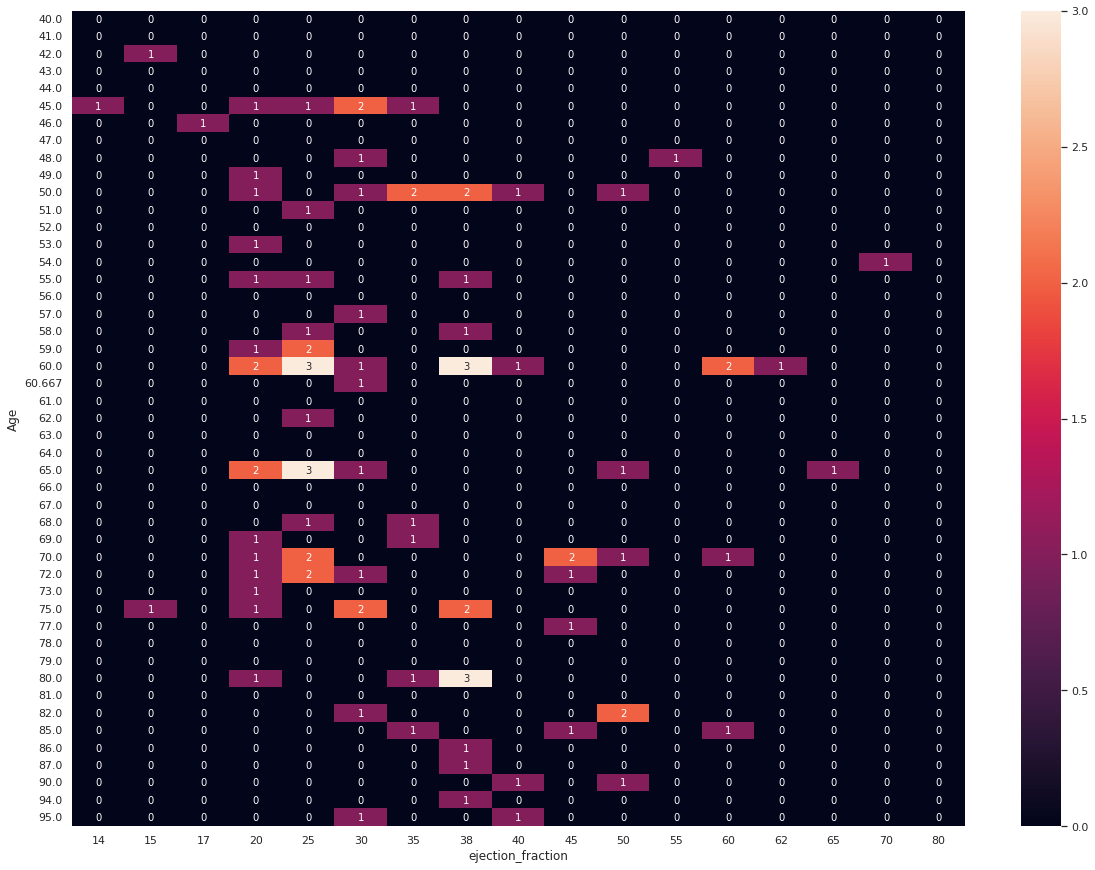

In [10]:
plt.subplots(figsize=(20,15))
sns.heatmap(agg_data2_p, annot=True)
plt.show()

##Pair Plot

In [11]:
subset = heart_failure_data.iloc[:,[0,1,2,3,4]]
subset.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction
0,75.0,0,582,0,20
1,55.0,0,7861,0,38
2,65.0,0,146,0,20
3,50.0,1,111,0,20
4,65.0,1,160,1,20


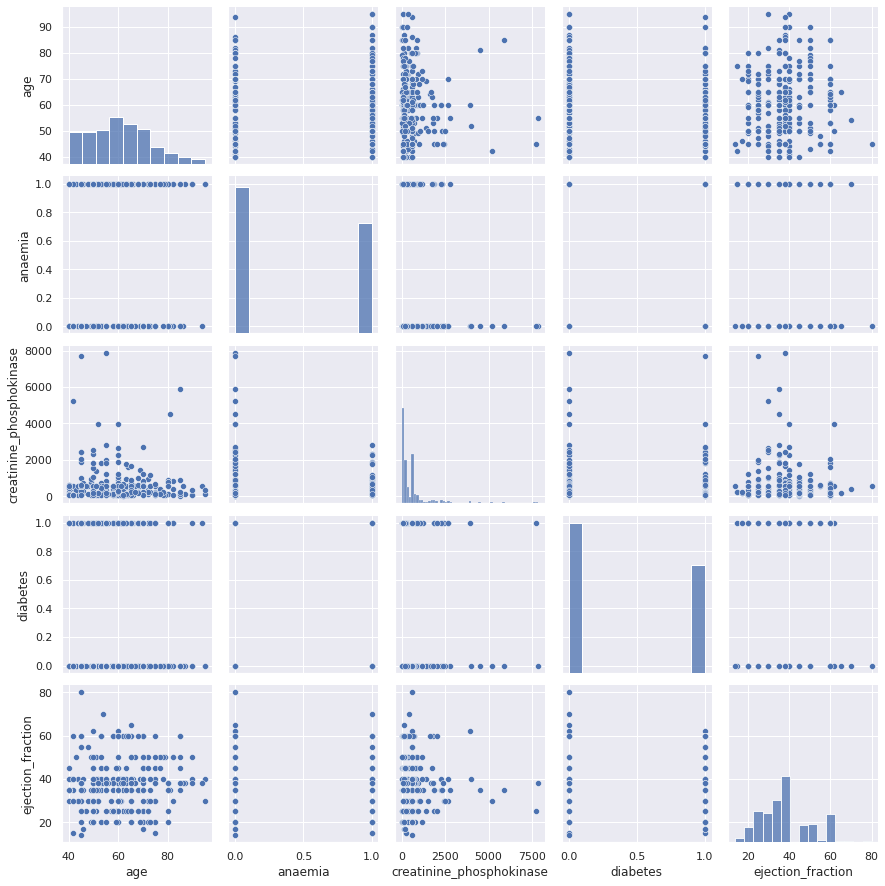

In [12]:
sns.pairplot(subset)